In [1]:
]activate .; instantiate

 Activating environment at `C:\Users\Johannes\Documents\MEGA\Studium\BA\FastRunningMedian\benchmark\Project.toml`


In [2]:
using SortFilters, FastRunningMedian, BenchmarkTools, PyPlot, RollingFunctions, RCall

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278
┌ Info: Precompiling RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1278


In [3]:
# window sizes
W = [5, 15, 51, 151, 515, 1515]
# input length
N = 1_000_000

x = rand(N)

1000000-element Array{Float64,1}:
 0.9490613057377799
 0.19463454917309853
 0.4772211001122115
 0.0644746775389613
 0.6952686427778012
 0.8401011722791325
 0.9625730224262321
 0.965113844094724
 0.33920452507228016
 0.8423773398879564
 0.629494916921993
 0.7020788957858171
 0.01225587586033905
 ⋮
 0.8004456052661133
 0.5288372092657732
 0.15761449704712516
 0.25046778465441166
 0.31345176814872344
 0.9515889875441708
 0.031576159170698004
 0.5170160900807685
 0.43642433499122224
 0.9907957850218898
 0.05888337103044794
 0.27910154057031544

In [4]:
# arrays for Benchmark results
FRM_results = [] # FastRunningMedian
SF_results = [] # SortingFilters
RF_results = [] # RollingFilters
R_results = [] # R via RCall
xr = robject(x)
RR_mean = [] # R raw (natively benchmarked via R-package microbenchmark)
RR_min = []
RR_max = []
R"library(microbenchmark)"
R"x <- $x";

RObject{RealSxp}
    [1] 9.490613e-01 1.946345e-01 4.772211e-01 6.447468e-02 6.952686e-01
    [6] 8.401012e-01 9.625730e-01 9.651138e-01 3.392045e-01 8.423773e-01
   [11] 6.294949e-01 7.020789e-01 1.225588e-02 6.793451e-01 8.569836e-01
   [16] 9.498310e-01 1.697275e-01 8.788917e-01 7.038877e-01 8.185098e-02
   [21] 5.782926e-01 1.321364e-02 1.770770e-01 4.697286e-01 9.499684e-01
   [26] 6.670176e-01 1.894157e-02 3.009507e-01 9.230241e-01 9.379917e-01
   [31] 1.875179e-01 6.904106e-01 7.527400e-01 7.485716e-01 5.506469e-01
   [36] 6.941334e-01 2.894518e-01 1.831206e-01 7.858760e-01 2.345321e-01
   [41] 6.068657e-01 2.286368e-01 8.252421e-02 1.271800e-01 9.496993e-01
   [46] 3.402660e-01 7.311497e-01 5.269489e-01 7.510636e-01 9.428120e-01
   [51] 7.525013e-01 7.379912e-01 1.937265e-01 2.400279e-02 6.900232e-01
   [56] 5.564422e-01 1.781015e-01 9.901935e-03 5.514009e-01 9.761848e-01
   [61] 8.202871e-02 1.581653e-01 5.059797e-01 8.633848e-01 6.874046e-01
   [66] 1.150165e-01 3.449308e-01 

WARNING: Takes long time

In [5]:
for w in W
    trial_FRM = @benchmark running_median($x, $w)
    push!(FRM_results, trial_FRM)
    
    trial_SF = @benchmark movsort($x, $w, $.5)
    push!(SF_results, trial_SF)
    
    trial_RF = @benchmark runmedian($x, $w)
    push!(RF_results, trial_RF)
    
    wr = robject(w)
    trial_R = @benchmark rcopy(rcall(:runmed, $x, $w))
    push!(R_results, trial_R)
    
    R"w <- $w"
    R"result <- summary(microbenchmark(runmed(x, w)))"
    push!(RR_mean, rcopy(R"result['mean']")[1][1])
    push!(RR_min, rcopy(R"result['min']")[1][1])
    push!(RR_max, rcopy(R"result['max']")[1][1])
end

In [6]:
FRM_mean =  [(FRM_results[i]|>mean).time/1e9 for i in eachindex(FRM_results)]

6-element Array{Float64,1}:
 0.04557769732727273
 0.05310337587368421
 0.062254095074074076
 0.06719313465333333
 0.07427958379411764
 0.08379850341666667

In [7]:
FRM_min =  [(FRM_results[i]|>minimum).time/1e9 for i in eachindex(FRM_results)]

6-element Array{Float64,1}:
 0.0423384
 0.050129499
 0.058796699
 0.063485301
 0.0710538
 0.079444901

In [8]:
FRM_max =  [(FRM_results[i]|>maximum).time/1e9 for i in eachindex(FRM_results)]

6-element Array{Float64,1}:
 0.0641282
 0.0672105
 0.0801321
 0.0797951
 0.083998799
 0.093117999

In [9]:
SF_mean =  [(SF_results[i]|>mean).time/1e9 for i in eachindex(SF_results)]

6-element Array{Float64,1}:
 0.03800155474242424
 0.07618253484848485
 0.15156821512121213
 0.3316803374375
 0.9363720166666666
 2.7068834005

In [10]:
SF_min =  [(SF_results[i]|>minimum).time/1e9 for i in eachindex(SF_results)]

6-element Array{Float64,1}:
 0.035627999
 0.0725668
 0.1453653
 0.3168814
 0.9104248
 2.692060201

In [11]:
SF_max =  [(SF_results[i]|>maximum).time/1e9 for i in eachindex(SF_results)]

6-element Array{Float64,1}:
 0.0501119
 0.096647099
 0.1638301
 0.3669089
 0.9764008
 2.7217066

In [12]:
RF_mean =  [(RF_results[i]|>mean).time/1e9 for i in eachindex(RF_results)]

6-element Array{Float64,1}:
  0.14487195137142858
  0.3826950357857143
  1.2554761505
  4.05009165
 16.305538501
 52.902859

In [13]:
RF_min =  [(RF_results[i]|>minimum).time/1e9 for i in eachindex(RF_results)]

6-element Array{Float64,1}:
  0.1124653
  0.338497801
  1.2031863
  4.0356375
 16.305538501
 52.902859

In [14]:
RF_max =  [(RF_results[i]|>maximum).time/1e9 for i in eachindex(RF_results)]

6-element Array{Float64,1}:
  0.283348501
  0.502098
  1.3651228
  4.0645458
 16.305538501
 52.902859

In [15]:
R_mean =  [(R_results[i]|>mean).time/1e9 for i in eachindex(R_results)]

6-element Array{Float64,1}:
 0.06104813170731708
 0.08943410714285716
 0.10398279991836734
 0.11701985569767442
 0.1623107740967742
 0.2163226085

In [16]:
R_min =  [(R_results[i]|>minimum).time/1e9 for i in eachindex(R_results)]

6-element Array{Float64,1}:
 0.0515505
 0.080029499
 0.0955512
 0.1083767
 0.1376755
 0.195353801

In [17]:
R_max =  [(R_results[i]|>maximum).time/1e9 for i in eachindex(R_results)]

6-element Array{Float64,1}:
 0.0900992
 0.117079099
 0.126873201
 0.141144199
 0.254506201
 0.2453075

In [18]:
# convert units
RR_mean .*= 1e-3
RR_min .*= 1e-3
RR_max .*= 1e-3

6-element Array{Any,1}:
 0.036678800000000004
 0.06291290000000001
 0.07895630000000001
 0.0956176
 0.129184
 0.2301273

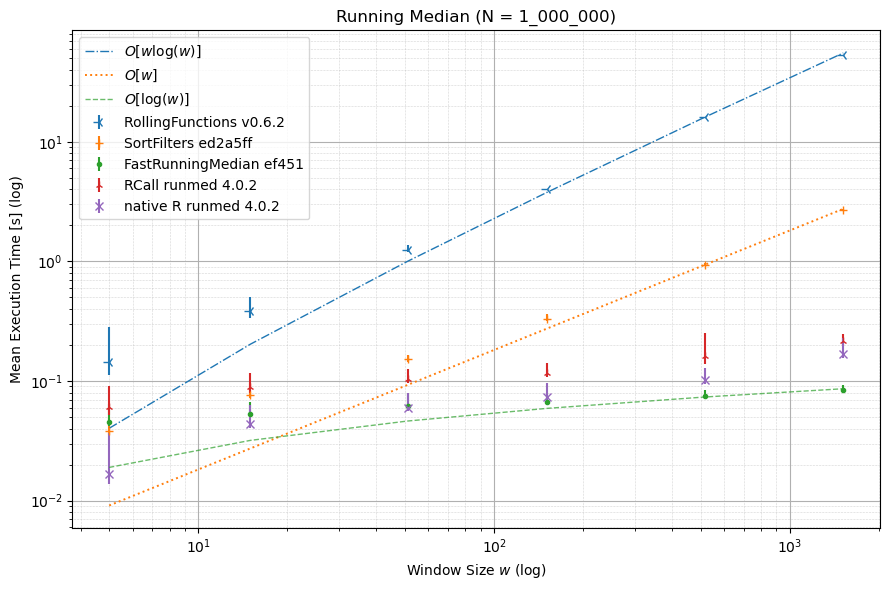

In [19]:
figure(figsize=[9, 6])
errorbar(W, RF_mean, [RF_mean .- RF_min RF_max .- RF_mean]|>transpose, fmt="3", markersize=8, label="RollingFunctions v0.6.2")
errorbar(W, SF_mean, [SF_mean .- SF_min SF_max .- SF_mean]|>transpose, fmt="+", markersize=6, label="SortFilters ed2a5ff")
errorbar(W, FRM_mean, [FRM_mean .- FRM_min FRM_max .- FRM_mean]|>transpose, fmt=".", label="FastRunningMedian ef451")
errorbar(W, R_mean, [R_mean .- R_min R_max .- R_mean]|>transpose, fmt="2", label="RCall runmed 4.0.2")
errorbar(W, RR_mean, [RR_mean .- RR_min RR_max .- RR_mean]|>transpose, fmt="x", label="native R runmed 4.0.2")
gca()[:set_prop_cycle](nothing)
plot(W, (log.(W).*W)./200, "-.", linewidth=1, label=L"O[w \log (w)]")
plot(W, W./550, ":", linewidth=1.4, label=L"O[w]")
plot(W, log.(W)./85, "--", alpha=.7, linewidth=1, label=L"O[\log (w)]")
loglog()
plt.minorticks_on()
grid(which="major")
grid(which="minor", linestyle=":", linewidth=.4)
ylabel("Mean Execution Time [s] (log)")
xlabel(L"Window Size $w$ (log)")
title("Running Median (N = 1_000_000)")
legend()
tight_layout()
savefig("../docs/src/Running Median Benchmarks.png")